In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score, make_scorer, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler

import statsmodels.api as sm
import scipy.stats as stats

In [5]:
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [6]:
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
model_df1 = pd.read_csv('../dataset/model_df1_n.csv')

In [17]:
print(model_df1.shape)
model_df1.head()

(16318, 41)


,offence_misc_CB_home,offence_misc_MF_home,offence_misc_SB_home,offence_misc_ST_home,offence_misc_W_home,movement_CB_home,movement_MF_home,movement_SB_home,movement_ST_home,movement_W_home,passing_CB_home,passing_SB_home,shooting_CB_home,shooting_SB_home,defence_CB_home,defence_MF_home,defence_SB_home,defence_ST_home,defence_W_home,goalkeeping_GK_home,offence_misc_CB_away,offence_misc_MF_away,offence_misc_SB_away,offence_misc_ST_away,offence_misc_W_away,movement_CB_away,movement_MF_away,movement_SB_away,movement_ST_away,movement_W_away,passing_CB_away,passing_SB_away,shooting_CB_away,shooting_SB_away,defence_CB_away,defence_MF_away,defence_SB_away,defence_ST_away,defence_W_away,goalkeeping_GK_away,result
0,70.16,76.780000,65.913333,67.666667,73.863333,64.00,74.34,66.83,75.66,72.66,59.67,62.66,49.12,56.50,77.62,66.62,81.50,49.38,78.88,81.25,63.84,67.240000,56.835000,60.510000,71.530000,55.00,66.83,68.84,67.84,71.16,51.67,67.34,41.88,53.38,69.41,70.75,64.50,36.71,61.75,73.50,win
1,59.34,57.513333,60.460000,63.260000,66.366667,53.00,66.16,44.16,64.83,64.25,53.17,43.34,34.62,35.62,64.50,45.42,59.12,48.12,55.81,72.50,65.50,58.286667,55.761667,62.193333,61.136667,54.66,68.67,63.00,67.67,67.00,63.84,61.34,54.00,58.12,69.50,66.50,63.62,32.50,34.12,69.25,win
2,71.66,75.833333,73.141667,77.613333,75.313333,68.00,72.89,72.67,87.67,79.16,71.00,77.34,53.00,64.38,75.31,57.42,74.38,42.75,67.00,82.00,69.67,67.113333,52.625000,51.250000,63.833333,63.17,68.44,60.17,57.00,70.67,68.66,60.50,55.50,42.00,72.25,60.33,70.50,63.50,33.62,75.75,win
3,59.66,66.736667,63.353333,64.706667,58.816667,57.84,76.50,39.16,71.83,58.84,51.66,53.16,45.69,30.75,71.50,35.38,51.88,37.38,68.50,17.00,63.17,73.070000,59.205000,62.080000,70.780000,63.50,76.17,73.42,75.34,72.34,53.16,71.25,35.25,64.69,71.88,68.88,74.50,28.25,65.38,82.00,win
4,65.41,64.566667,52.111667,56.223333,69.890000,69.17,68.45,56.66,63.33,76.83,71.00,49.34,44.12,46.38,80.38,62.75,47.75,39.75,40.50,79.25,69.66,74.686667,67.876667,70.083333,65.250000,64.83,76.56,70.00,81.33,70.50,65.00,70.50,48.12,58.62,77.50,66.92,72.62,37.75,60.38,67.25,tie


In [13]:
model_df1['result'].value_counts()['lose']/model_df1['result'].value_counts()['tie']

1.1826302729528535

In [12]:
model_df1['result'].value_counts()['win']/model_df1['result'].value_counts()['tie']

1.8665012406947892

**Train on dummy classifier**

In [32]:
ratio = [1.18263, 1, 1.8665]

In [33]:
def dummy_classifier(X, ratio):
    results = []
    for _ in range(len(X)):
        result = random.choices(['lose', 'tie', 'win'], weights=ratios, k=1)[0]
        results.append(result)
    return results

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    model_df1.drop(columns='result'), model_df1['result'], test_size=0.25, random_state=47)

In [35]:
y_pred = dummy_classifier(X_test, ratio = ratio)

              precision    recall  f1-score   support

        lose       0.29      0.46      0.35      1158
         tie       0.24      0.24      0.24      1027
         win       0.46      0.29      0.36      1895

    accuracy                           0.33      4080
   macro avg       0.33      0.33      0.32      4080
weighted avg       0.36      0.33      0.33      4080



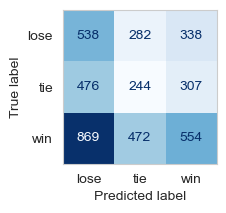

In [36]:
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred, labels=['lose', 'tie', 'win'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['lose', 'tie', 'win'])

fig, ax = plt.subplots(figsize=(2, 2))  
disp.plot(ax=ax,cmap=plt.cm.Blues, colorbar = False)  
plt.grid(False)
plt.show()  

#### Train on model with plain stats

In [16]:
model_df1.isna().sum()

offence_misc_CB_home    0
offence_misc_MF_home    0
offence_misc_SB_home    0
offence_misc_ST_home    0
offence_misc_W_home     0
movement_CB_home        0
movement_MF_home        0
movement_SB_home        0
movement_ST_home        0
movement_W_home         0
passing_CB_home         0
passing_SB_home         0
shooting_CB_home        0
shooting_SB_home        0
defence_CB_home         0
defence_MF_home         0
defence_SB_home         0
defence_ST_home         0
defence_W_home          0
goalkeeping_GK_home     0
offence_misc_CB_away    0
offence_misc_MF_away    0
offence_misc_SB_away    0
offence_misc_ST_away    0
offence_misc_W_away     0
movement_CB_away        0
movement_MF_away        0
movement_SB_away        0
movement_ST_away        0
movement_W_away         0
passing_CB_away         0
passing_SB_away         0
shooting_CB_away        0
shooting_SB_away        0
defence_CB_away         0
defence_MF_away         0
defence_SB_away         0
defence_ST_away         0
defence_W_aw

In [24]:
def get_importance(df, target):
    '''
    Train a Random Forest Classifier on the given DataFrame `df` to predict the `target` column. 
    Show confusion matrix and plot feature importance     
    
    Args: df(dataframe): dataframe in format that fits Random Forest Classifier
          target(string): dependent variable
    '''
        
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop(columns=target), df[target], test_size=0.25, random_state=47)
    
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)
    feature_importances = rf_model.feature_importances_
    features = X_train.columns
    
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)

    fig, ax = plt.subplots(figsize=(2, 2))  
    disp.plot(ax=ax,cmap=plt.cm.Blues, colorbar = False)  
    plt.grid(False)
    plt.show()  
    
    feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    sorted_feature_importance_df = sorted_feature_importance_df.reset_index(drop = True)

    plt.figure(figsize=(len(sorted_feature_importance_df)*0.3, len(sorted_feature_importance_df)*0.2))
    bars = plt.barh(sorted_feature_importance_df['Feature'], sorted_feature_importance_df['Importance'], color='lavender')
    for bar in bars:
        plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', va='center')

    plt.xticks(rotation=0) 
    plt.gca().invert_yaxis()
    plt.xlim(0, 0.05)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances in Random Forest')
    plt.tight_layout()
    plt.show()
    
    return sorted_feature_importance_df

              precision    recall  f1-score   support

        lose       0.46      0.45      0.45      1158
         tie       0.32      0.04      0.08      1027
         win       0.54      0.80      0.65      1895

    accuracy                           0.51      4080
   macro avg       0.44      0.43      0.39      4080
weighted avg       0.46      0.51      0.45      4080



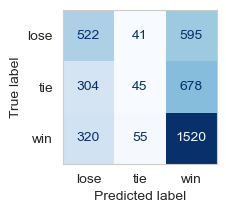

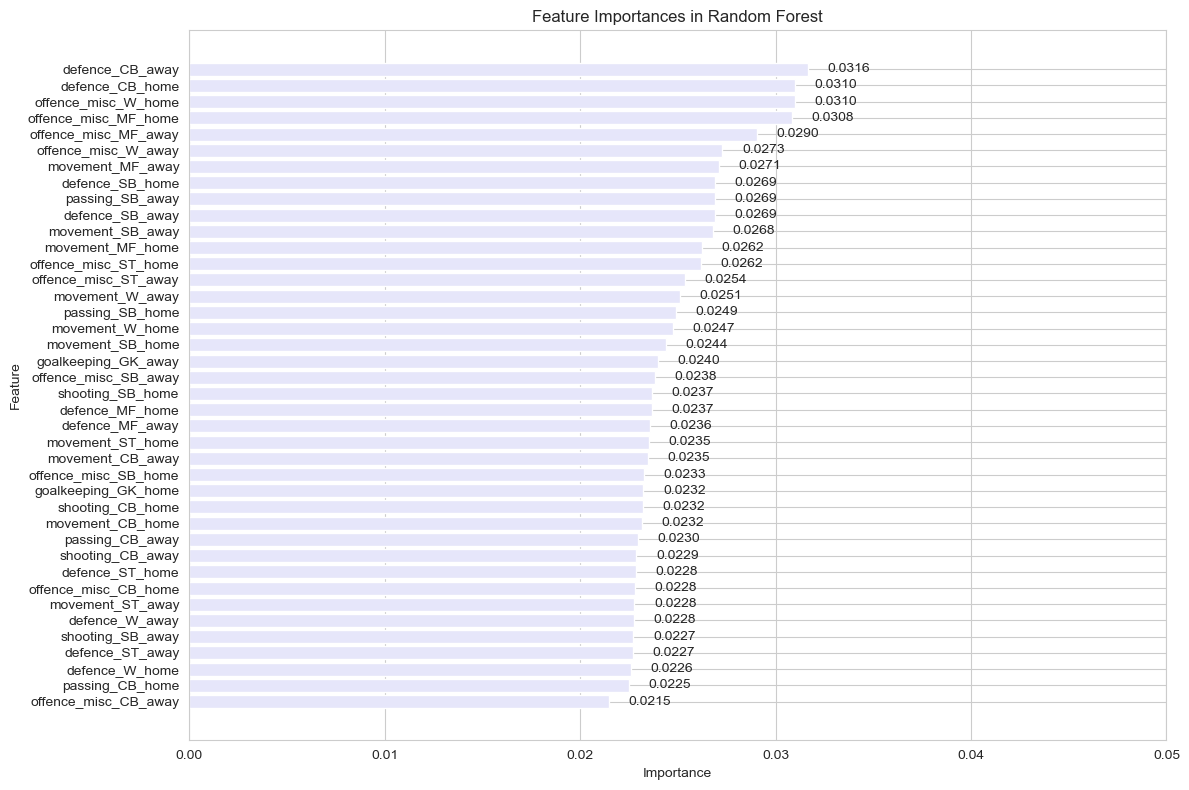

In [25]:
# Check feature importance
importance_df = get_importance(model_df1, 'result')

There is difference between feature importance but not severe.

In [27]:
model_df1['result'] = model_df1['result'].replace({'win': 2, 'tie': 1, 'lose':0})
model_df1['result'] = model_df1['result'].astype('category')

- Prepare a binned model

In [28]:
X = model_df1.drop(columns = 'result')

In [29]:
num_bins = 6
bin_labels = [0, 1, 2, 3, 4, 5]

# Create a new DataFrame to hold the binned data
model_df1_bin = model_df1.copy()

bin_edges_dict = {}

for col in X.columns:
    # Calculate mean and standard deviation
    mean = model_df1[col].mean()
    std = model_df1[col].std()
    
    # Define bin edges based on the mean and standard deviation
    bin_edges = [mean - 3 * std] + [mean - std] + [mean] + [mean + std] + [mean + 3 * std]
    
    # Assign bin labels based on the bin edges
    model_df1_bin[col] = np.searchsorted(bin_edges, model_df1[col])
    
    bin_edges_dict[col] = bin_edges

In [30]:
model_df1_bin.head()

,offence_misc_CB_home,offence_misc_MF_home,offence_misc_SB_home,offence_misc_ST_home,offence_misc_W_home,movement_CB_home,movement_MF_home,movement_SB_home,movement_ST_home,movement_W_home,passing_CB_home,passing_SB_home,shooting_CB_home,shooting_SB_home,defence_CB_home,defence_MF_home,defence_SB_home,defence_ST_home,defence_W_home,goalkeeping_GK_home,offence_misc_CB_away,offence_misc_MF_away,offence_misc_SB_away,offence_misc_ST_away,offence_misc_W_away,movement_CB_away,movement_MF_away,movement_SB_away,movement_ST_away,movement_W_away,passing_CB_away,passing_SB_away,shooting_CB_away,shooting_SB_away,defence_CB_away,defence_MF_away,defence_SB_away,defence_ST_away,defence_W_away,goalkeeping_GK_away,result
0,4,4,3,3,3,3,4,2,3,2,3,2,3,3,3,3,4,4,5,4,4,3,2,2,3,2,2,3,2,2,2,3,2,3,2,4,2,3,4,3,2
1,3,1,2,2,2,2,2,0,2,1,2,1,1,1,2,1,1,4,4,2,4,1,2,2,2,2,3,2,2,1,4,2,4,3,2,3,2,3,2,2,2
2,4,4,4,4,4,4,3,3,4,3,4,4,4,4,3,2,3,4,4,4,4,3,1,1,2,3,3,1,1,2,4,2,4,2,3,3,3,5,2,3,2
3,3,2,3,2,1,3,4,0,2,1,2,1,3,1,2,1,1,3,4,0,4,3,2,2,3,3,4,3,3,2,2,3,2,4,3,3,3,2,4,4,2
4,4,2,1,1,3,4,3,1,1,3,4,1,3,2,4,3,0,3,2,3,4,4,3,3,2,4,4,3,4,2,4,3,3,3,3,3,3,3,4,2,1


In [31]:
model_df1_bin['result'] = model_df1_bin['result'].replace({'win': 2, 'tie': 1, 'lose':0})
model_df1_bin['result'] = model_df1_bin['result'].astype('category')

- Model in multiple pipelines

In [21]:
lr_pipeline = Pipeline([('lr', LogisticRegression())])
rf_pipeline = Pipeline([('rf', RandomForestClassifier())])
nb_pipeline = Pipeline([('nb', GaussianNB())])
xgb_pipeline = Pipeline([('xgb', XGBClassifier())])

pipelines = [lr_pipeline, rf_pipeline, nb_pipeline, xgb_pipeline]

In [25]:
def get_best_model(df, target, scale = True, oversampler = False):
    '''
    Train multiple classifier model on the given DataFrame `df` to predict the specified `target` column. 
    Print accuracy score of all models and print the confusion matrix of the one with highest score.   
    
    Args: df(dataframe): dataframe in format that fits models in pipelines
          target(string): dependent variable    
          scale(boolean): scaler or not
          oversampler(boolean): oversampler or not
    '''    
    
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=target), 
                                                    df[target], test_size=0.25, 
                                                    random_state=47)
    
    if scale == True:
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test= scaler.transform(X_test)
    
    if oversampler == True:
        oversampler = SMOTE(sampling_strategy='auto', random_state=42)
        X_train, y_train = oversampler.fit_resample(X_train, y_train)
    

    fig, axes = plt.subplots(1, 4, figsize=(16, 5))
    fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

    for pipeline, ax in zip(pipelines, axes.flatten()):
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        model_name = pipeline.steps[-1][1].__class__.__name__
        
        print(model_name)
        print(classification_report(y_test, y_pred))
        cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)

        # Plot the confusion matrix horizontally
        disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
        ax.grid(False)
        ax.set_title(f'Confusion Matrix - {model_name}')

    plt.tight_layout()
    plt.show()

LogisticRegression
              precision    recall  f1-score   support

           0       0.44      0.58      0.50      1158
           1       0.29      0.23      0.26      1027
           2       0.62      0.56      0.59      1895

    accuracy                           0.48      4080
   macro avg       0.45      0.46      0.45      4080
weighted avg       0.48      0.48      0.48      4080

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.44      0.52      0.47      1158
           1       0.26      0.17      0.21      1027
           2       0.58      0.62      0.60      1895

    accuracy                           0.48      4080
   macro avg       0.43      0.44      0.43      4080
weighted avg       0.46      0.48      0.47      4080

GaussianNB
              precision    recall  f1-score   support

           0       0.44      0.49      0.46      1158
           1       0.27      0.35      0.31      1027
           2       0.6

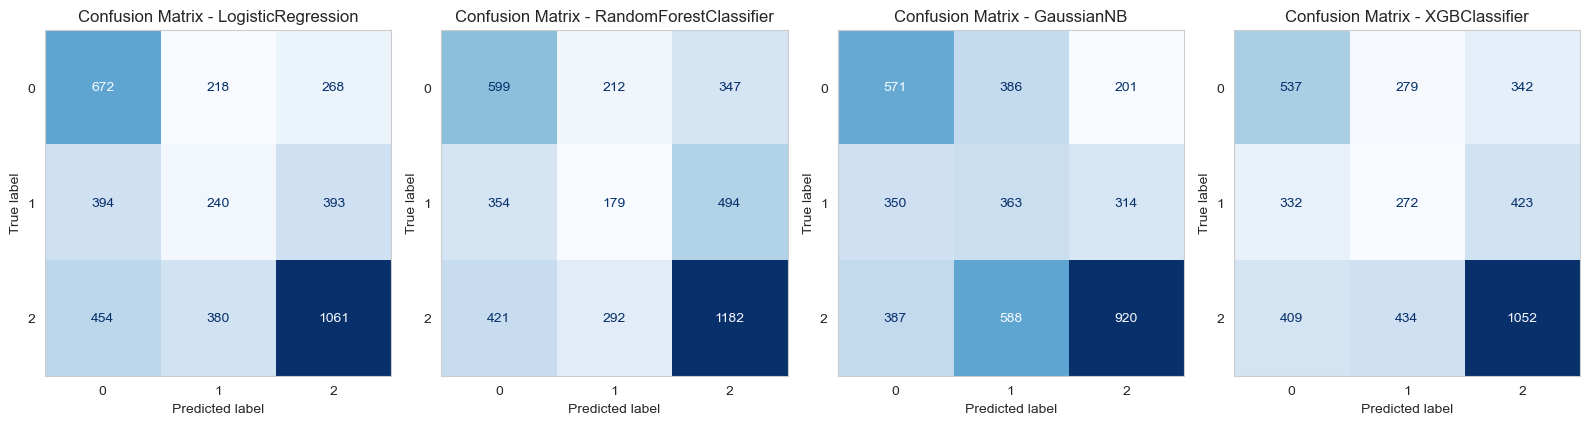

In [58]:
get_best_model(model_df1, 'result', oversampler = True)

LogisticRegression
              precision    recall  f1-score   support

           0       0.44      0.58      0.50      1158
           1       0.29      0.24      0.26      1027
           2       0.62      0.57      0.59      1895

    accuracy                           0.49      4080
   macro avg       0.45      0.46      0.45      4080
weighted avg       0.49      0.49      0.48      4080

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.44      0.46      0.45      1158
           1       0.29      0.08      0.12      1027
           2       0.55      0.75      0.63      1895

    accuracy                           0.50      4080
   macro avg       0.43      0.43      0.40      4080
weighted avg       0.45      0.50      0.45      4080

GaussianNB
              precision    recall  f1-score   support

           0       0.43      0.51      0.47      1158
           1       0.27      0.32      0.30      1027
           2       0.6

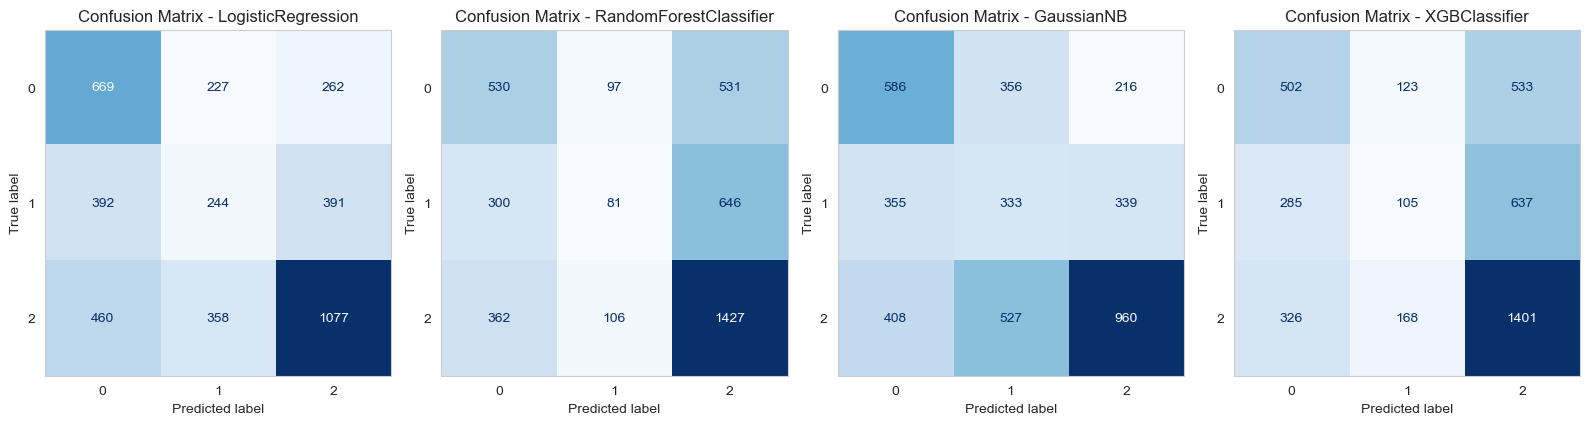

In [57]:
get_best_model(model_df1_bin, 'result', oversampler = True)

In [62]:
# Try remove the noise_cols from EDA
model_df1_n = model_df1.drop(columns = ['offence_misc_SB_home', 'movement_ST_home', 'defence_MF_home', 'defence_W_home', 
                                        'offence_misc_SB_away', 'passing_CB_away', 'defence_W_away'])

LogisticRegression
              precision    recall  f1-score   support

           0       0.45      0.58      0.51      1158
           1       0.29      0.24      0.26      1027
           2       0.62      0.57      0.59      1895

    accuracy                           0.49      4080
   macro avg       0.45      0.46      0.45      4080
weighted avg       0.49      0.49      0.48      4080

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.45      0.50      0.47      1158
           1       0.28      0.20      0.24      1027
           2       0.59      0.64      0.61      1895

    accuracy                           0.49      4080
   macro avg       0.44      0.45      0.44      4080
weighted avg       0.47      0.49      0.48      4080

GaussianNB
              precision    recall  f1-score   support

           0       0.44      0.50      0.47      1158
           1       0.26      0.34      0.30      1027
           2       0.6

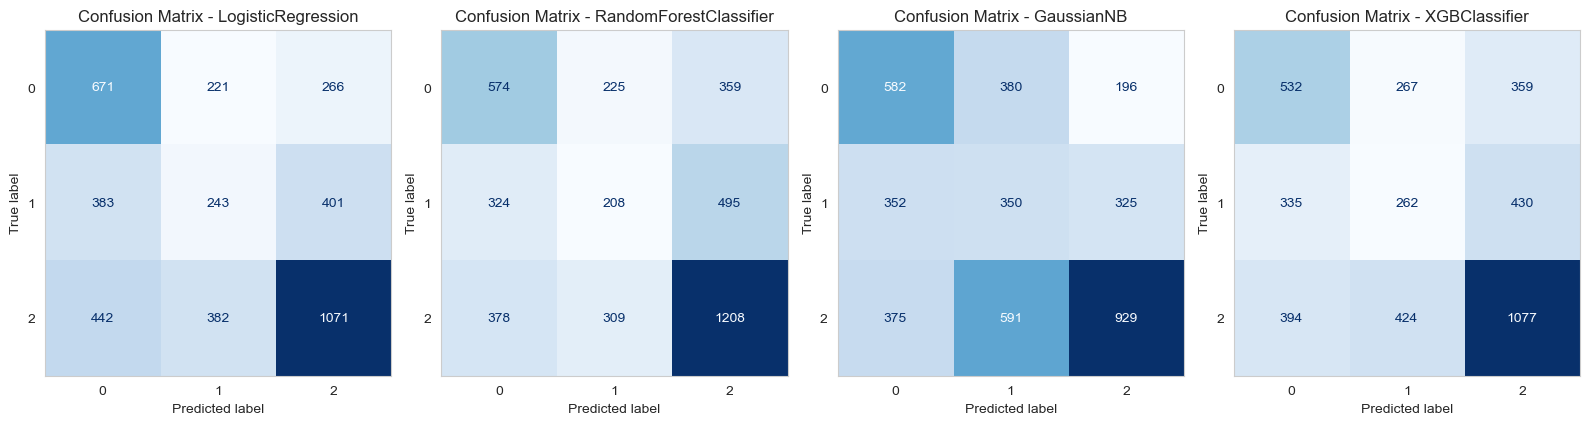

In [63]:
get_best_model(model_df1_n, 'result', oversampler = True)

In [66]:
def logistic_Grid_CV(df, target, scale = True, oversampler = False):
    '''
    Train logistic regression model and execute GridSearch on the given DataFrame `df` to predict the specified `target` column. 
    Print the confusion matrix.   
    
    Args: df(dataframe): dataframe in format that fits logistic regression model.
          target(string): dependent variable    
          scale(boolean): scaler or not
          oversampler(boolean): oversampler or not
    '''   
    
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop(columns=target), df[target], test_size=0.25, random_state=47)

    if scale == True:
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test= scaler.transform(X_test)
    
    if oversampler == True:
        oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
        X_train, y_train = oversampler.fit_resample(X_train, y_train)
        
    param_grid = {
        'C': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0],
        'penalty': ['l1', 'l2'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
        'max_iter': [100, 200, 1000],
        'class_weight': [None, 'balanced'],
    }

    logistic_model = LogisticRegression() 
    grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring=make_scorer(accuracy_score))
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    print("Best hyperparameters:", best_params)
    best_logistic_model = grid_search.best_estimator_

    y_pred = best_logistic_model.predict(X_test)
    
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=best_logistic_model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_logistic_model.classes_)

    fig, ax = plt.subplots(figsize=(2, 2))  
    disp.plot(ax=ax,cmap=plt.cm.Blues, colorbar = False)  
    plt.grid(False)
    plt.show() 

Best hyperparameters: {'C': 5.0, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.44      0.58      0.50      1158
           1       0.27      0.22      0.24      1027
           2       0.62      0.57      0.59      1895

    accuracy                           0.48      4080
   macro avg       0.45      0.46      0.45      4080
weighted avg       0.48      0.48      0.48      4080



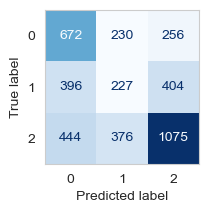

In [67]:
logistic_Grid_CV(model_df1, 'result', oversampler = True)

#### Train on model with advantage stats

In [34]:
model_df2 = pd.read_csv('../dataset/model_df2.csv')

In [35]:
print(model_df2.shape)
model_df2.head()

(16318, 10)


,result,offence_box_adv,offence_GK_adv,defence_box_adv,defence_GK_adv,offence_pass_adv,offence_move_adv,defence_pass_adv,defence_move_adv,offence_misc_adv
0,win,0.991337,0.903061,1.188616,1.213864,1.070371,1.055491,1.129365,0.939151,1.111281
1,win,0.986403,0.948087,0.958295,1.124031,0.857672,1.019841,1.031083,0.659104,1.009207
2,win,1.034116,0.974389,1.463961,1.603912,1.085814,1.315606,1.202458,1.028301,1.187167
3,win,0.746277,0.666098,1.056788,0.291221,0.842465,0.801417,0.828387,0.541333,0.908508
4,tie,0.899281,1.003717,0.985615,1.219231,0.815437,1.097571,0.919066,0.803688,0.880322


In [50]:
def get_importance2(df, target):
    '''
    Train a Random Forest Classifier on the given DataFrame `df` to predict the `target` column. 
    Show confusion matrix and plot feature importance     
    
    Args: df(dataframe): dataframe in format that fits Random Forest Classifier
          target(string): dependent variable
    '''
        
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop(columns=target), df[target], test_size=0.25, random_state=47)
    
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)
    feature_importances = rf_model.feature_importances_
    features = X_train.columns
    
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)

    fig, ax = plt.subplots(figsize=(2, 2))  
    disp.plot(ax=ax,cmap=plt.cm.Blues, colorbar = False)  
    plt.grid(False)
    plt.show()  
    
    feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    sorted_feature_importance_df = sorted_feature_importance_df.reset_index(drop = True)

    plt.figure(figsize=(12, 5))
    bars = plt.barh(sorted_feature_importance_df['Feature'], sorted_feature_importance_df['Importance'], color='lavender')
    for bar in bars:
        plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', va='center')

    plt.xticks(rotation=0) 
    plt.gca().invert_yaxis()
    plt.xlim(0, 0.2)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances in Random Forest')
    plt.tight_layout()
    plt.show()
    
    return sorted_feature_importance_df

              precision    recall  f1-score   support

        lose       0.46      0.47      0.46      1158
         tie       0.26      0.06      0.09      1027
         win       0.55      0.78      0.64      1895

    accuracy                           0.51      4080
   macro avg       0.42      0.43      0.40      4080
weighted avg       0.45      0.51      0.45      4080



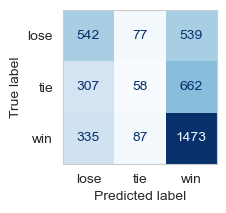

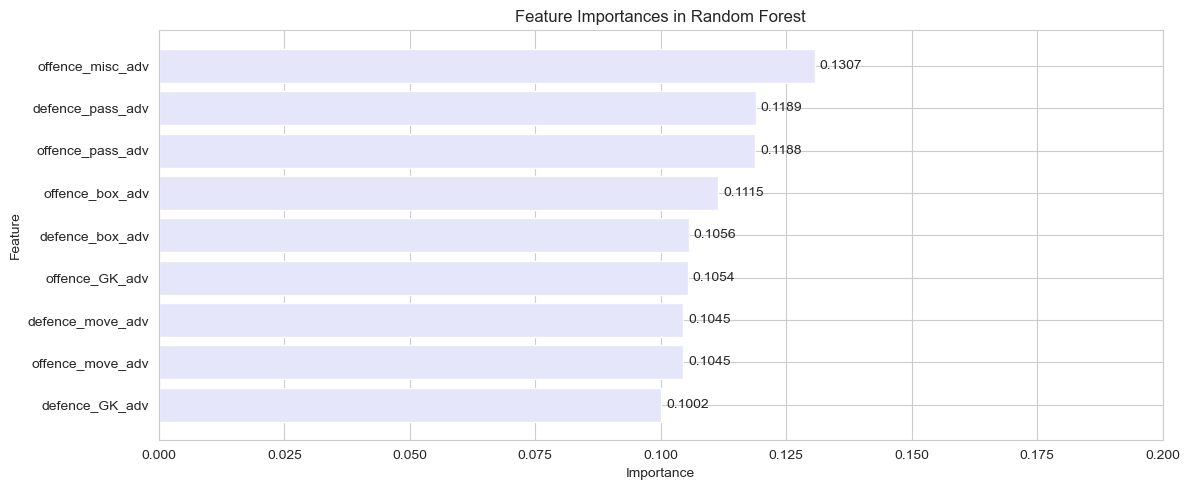

In [51]:
importance_df2 = get_importance2(model_df2, 'result')

The distribution of importance are close to each other

In [52]:
model_df2['result'] = model_df2['result'].replace({'win': 2, 'tie': 1, 'lose':0})
model_df2['result'] = model_df2['result'].astype('category')

In [53]:
X = model_df2.drop(columns = 'result')

In [54]:
num_bins = 6
bin_labels = [0, 1, 2, 3, 4, 5]

# Create a new DataFrame to hold the binned data
model_df2_bin = model_df2.copy()

bin_edges_dict = {}

for col in X.columns:
    # Calculate mean and standard deviation
    mean = model_df2[col].mean()
    std = model_df2[col].std()
    
    # Define bin edges based on the mean and standard deviation
    bin_edges = [mean - 3 * std] + [mean - std] + [mean] + [mean + std] + [mean + 3 * std]
    
    # Assign bin labels based on the bin edges
    model_df2_bin[col] = np.searchsorted(bin_edges, model_df2[col])
    
    bin_edges_dict[col] = bin_edges

LogisticRegression
              precision    recall  f1-score   support

           0       0.43      0.60      0.50      1158
           1       0.30      0.21      0.25      1027
           2       0.62      0.58      0.60      1895

    accuracy                           0.49      4080
   macro avg       0.45      0.46      0.45      4080
weighted avg       0.49      0.49      0.48      4080

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.43      0.50      0.46      1158
           1       0.25      0.19      0.22      1027
           2       0.59      0.60      0.59      1895

    accuracy                           0.47      4080
   macro avg       0.42      0.43      0.43      4080
weighted avg       0.46      0.47      0.46      4080

GaussianNB
              precision    recall  f1-score   support

           0       0.44      0.58      0.50      1158
           1       0.27      0.30      0.28      1027
           2       0.6

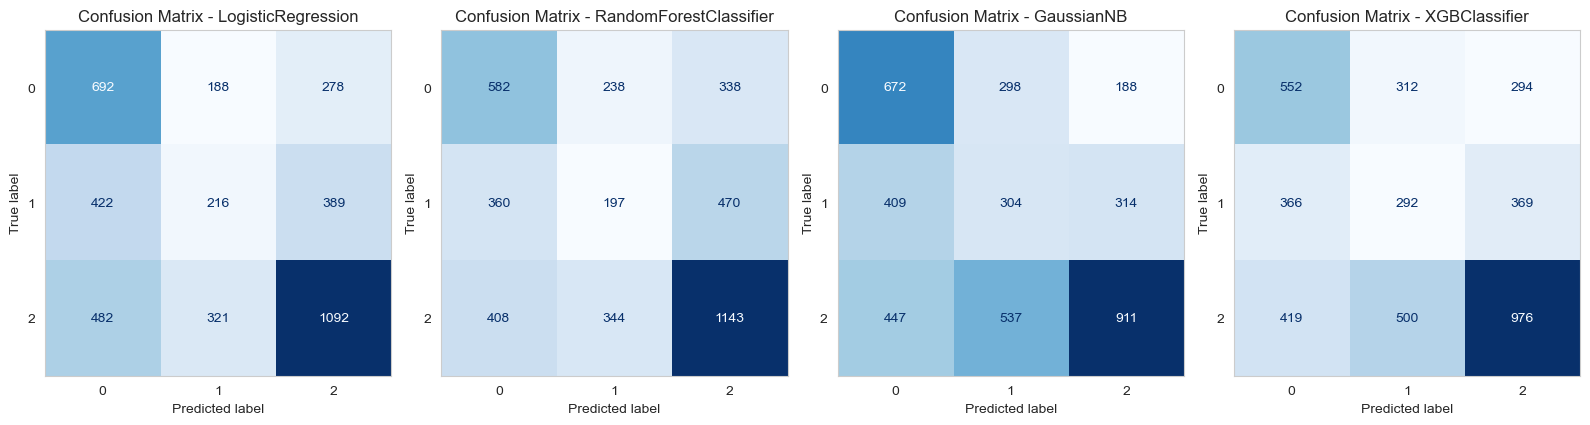

In [56]:
get_best_model(model_df2, 'result', oversampler = True)

LogisticRegression
              precision    recall  f1-score   support

           0       0.43      0.61      0.50      1158
           1       0.27      0.17      0.21      1027
           2       0.62      0.58      0.60      1895

    accuracy                           0.48      4080
   macro avg       0.44      0.45      0.44      4080
weighted avg       0.47      0.48      0.47      4080

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.41      0.45      0.43      1158
           1       0.26      0.21      0.23      1027
           2       0.55      0.57      0.56      1895

    accuracy                           0.44      4080
   macro avg       0.40      0.41      0.40      4080
weighted avg       0.43      0.44      0.44      4080

GaussianNB
              precision    recall  f1-score   support

           0       0.42      0.60      0.50      1158
           1       0.27      0.19      0.22      1027
           2       0.6

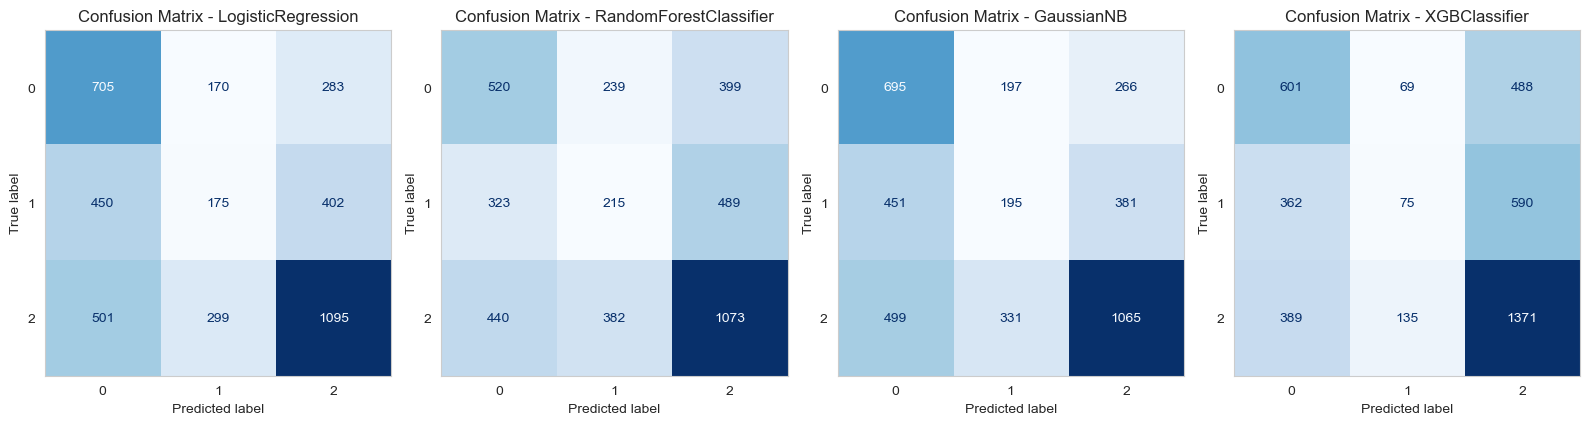

In [59]:
get_best_model(model_df2_bin, 'result', oversampler = True)

Best hyperparameters: {'C': 1.0, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
              precision    recall  f1-score   support

           0       0.44      0.61      0.51      1158
           1       0.30      0.21      0.25      1027
           2       0.62      0.58      0.60      1895

    accuracy                           0.49      4080
   macro avg       0.45      0.46      0.45      4080
weighted avg       0.49      0.49      0.48      4080



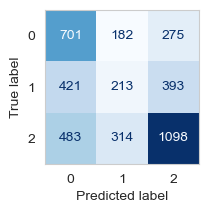

In [68]:
logistic_Grid_CV(model_df2, 'result', oversampler = True)

Summary: 

- The models with advantage stats and with plain stats have similiar performance, and both obviously better than the dummy classifier
- For the plain stats model, the most important features are: *defence_CB_home, passing_MF_away, passing_MF_home,
  defence_CB_away, shooting_ST_away, defence_SB_home, shooting_ST_home, defence_SB_away, passing_SB_away, passing_SB_home,  passing_W_home*
- For the engineered model, the most important features are: *offence_misc_adv, offence_pass_adv, defence_pass_adv, offence_box_adv*